<h1>1. Import Libaries</h1>

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

In [2]:
data = pd.read_csv("C:/Users/aajay/Downloads/archive (7)/Groceries_dataset.csv")

In [3]:
data.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [4]:
#Checking the datasets 
print(f"The Null values:{data.isnull().sum()}")
data.describe()

The Null values:Member_number      0
Date               0
itemDescription    0
dtype: int64


,Member_number
count,38765.000000
mean,3003.641868
std,1153.611031
min,1000.000000
25%,2002.000000
50%,3005.000000
75%,4007.000000
max,5000.000000


<h1>2. Data Preparation</h1>

In [5]:
df = data.groupby('Member_number')['itemDescription'].apply(lambda x: [item.capitalize() for item in  set(x)])

In [6]:
pd.set_option('display.max_colwidth', 100)
df.head()

Member_number
1000    [Pickled vegetables, Misc. beverages, Soda, Hygiene articles, Whole milk, Sausage, Canned beer, ...
1001      [Rolls/buns, Soda, Whipped/sour cream, Whole milk, Sausage, Frankfurter, White bread, Beef, Curd]
1002    [Butter milk, Whole milk, Butter, Frozen vegetables, Other vegetables, Specialty chocolate, Suga...
1003                           [Rolls/buns, Dental care, Sausage, Detergent, Root vegetables, Frozen meals]
1004    [Pastry, Rolls/buns, Frozen fish, Hygiene articles, Packaged fruit/vegetables, Whole milk, Red/b...
Name: itemDescription, dtype: object

In [7]:
#Convert into binary matrix
le = TransactionEncoder()
df_binary = le.fit_transform(df)
df1_bin = pd.DataFrame(df_binary, columns=le.columns_)

In [16]:
df1_bin.head()

,Abrasive cleaner,Artif. sweetener,Baby cosmetics,Bags,Baking powder,Bathroom cleaner,Beef,Berries,Beverages,Bottled beer,...,Uht-milk,Vinegar,Waffles,Whipped/sour cream,Whisky,White bread,White wine,Whole milk,Yogurt,Zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,True,False,False,False,...,False,False,False,True,False,True,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [9]:
#build a model 
freq_items = apriori(df1_bin, min_support=0.05, use_colnames=True, verbose=True)

Processing 36 combinations | Sampling itemset size 4 3


In [10]:
rules = association_rules(freq_items, metric='confidence', min_threshold=0.4 )

print(f"The Top 10 Frequent Itemset: {freq_items.sort_values(by='support', ascending=False).head(10)}")

In [11]:
filtered_r= rules[rules['confidence']>=0.5].sort_values(ascending=False, by='lift')
results_df = pd.DataFrame(filtered_r, columns=rules.columns)
results_df.reset_index(drop=True, inplace=True)
results_df.index = results_df.index + 0


<h1>Final Conclusion</h1>

In [12]:
results_df[['antecedents',	'consequents',	'support',	'confidence',	'lift']].head(10)

,antecedents,consequents,support,confidence,lift
0,"(Bottled water, Whole milk)",(Other vegetables),0.056183,0.500000,1.327657
1,"(Bottled water, Other vegetables)",(Whole milk),0.056183,0.598361,1.305941
2,"(Other vegetables, Yogurt)",(Whole milk),0.071832,0.597015,1.303003
3,"(Rolls/buns, Yogurt)",(Whole milk),0.065931,0.592166,1.292420
4,"(Other vegetables, Rolls/buns)",(Whole milk),0.082093,0.559441,1.220996
5,"(Soda, Yogurt)",(Whole milk),0.054387,0.557895,1.217622
6,"(Other vegetables, Soda)",(Whole milk),0.069266,0.557851,1.217528
7,"(Other vegetables, Tropical fruit)",(Whole milk),0.050539,0.553371,1.207749
8,"(Rolls/buns, Soda)",(Whole milk),0.065162,0.543897,1.187072
9,(Shopping bags),(Whole milk),0.091329,0.542683,1.184422


<p>From the final conclusion of this result, we have concluded that most of the customer frequently purchased items.</p>

<h1>Visualization</h1>

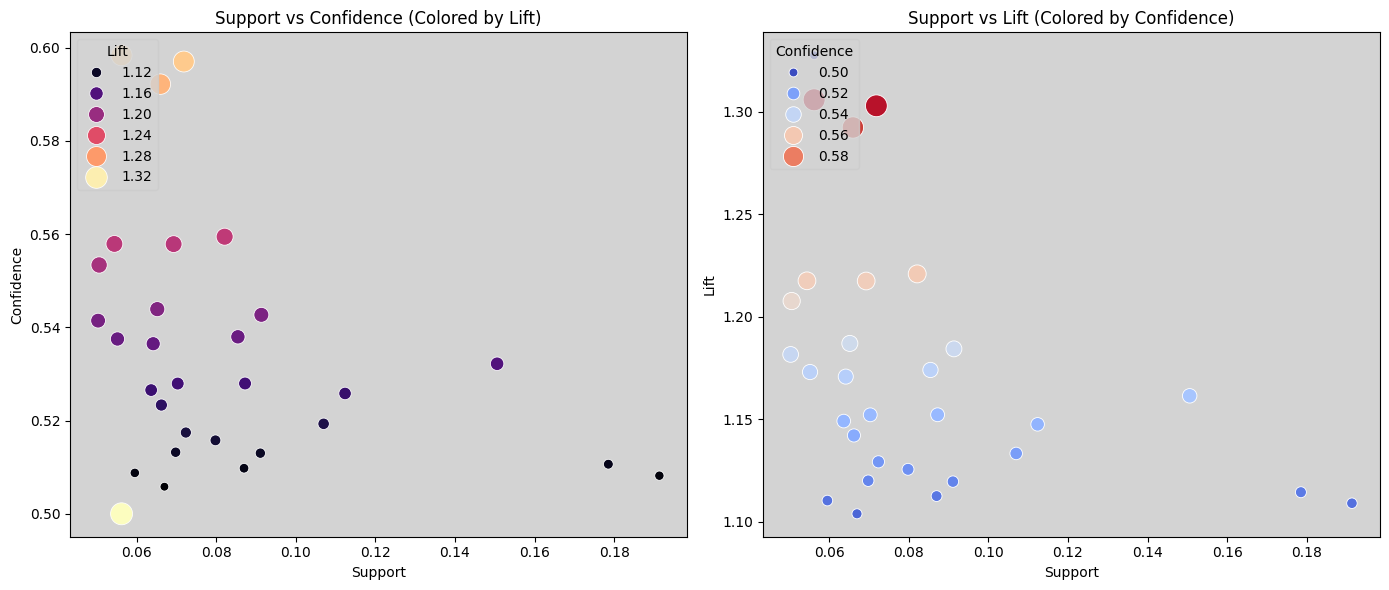

In [13]:
# Visualization
plt.rcParams['axes.facecolor'] = '#D3D3D3'
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# First scatter plot: Support vs Confidence (Colored by Lift)
sns.scatterplot(data=results_df, x='support', y='confidence', hue='lift', palette='magma', size='lift', ax=axes[0], sizes=(40,250))
axes[0].set_title('Support vs Confidence (Colored by Lift)')
axes[0].set_xlabel('Support')
axes[0].set_ylabel('Confidence')
axes[0].legend(title='Lift', loc='upper left')

# Second scatter plot: Support vs Lift (Colored by Confidence)
sns.scatterplot(data=results_df, x='support', y='lift', hue='confidence', palette='coolwarm', size='confidence', ax=axes[1], sizes=(40,250))
axes[1].set_title('Support vs Lift (Colored by Confidence)')
axes[1].set_xlabel('Support')
axes[1].set_ylabel('Lift')
axes[1].legend(title='Confidence', loc='upper left')

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the combined plot
plt.show()


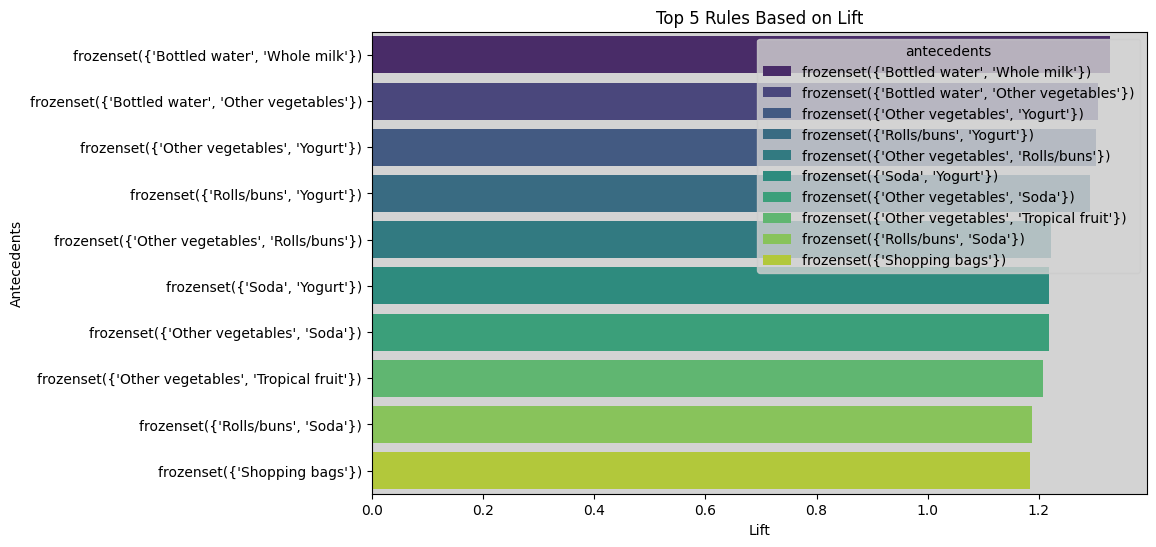

In [14]:

top_10_rules = results_df.sort_values(by='lift', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='lift', y='antecedents', hue= 'antecedents', data=top_10_rules, palette='viridis')
plt.title('Top 5 Rules Based on Lift')
plt.xlabel('Lift')
plt.ylabel('Antecedents')
plt.show()


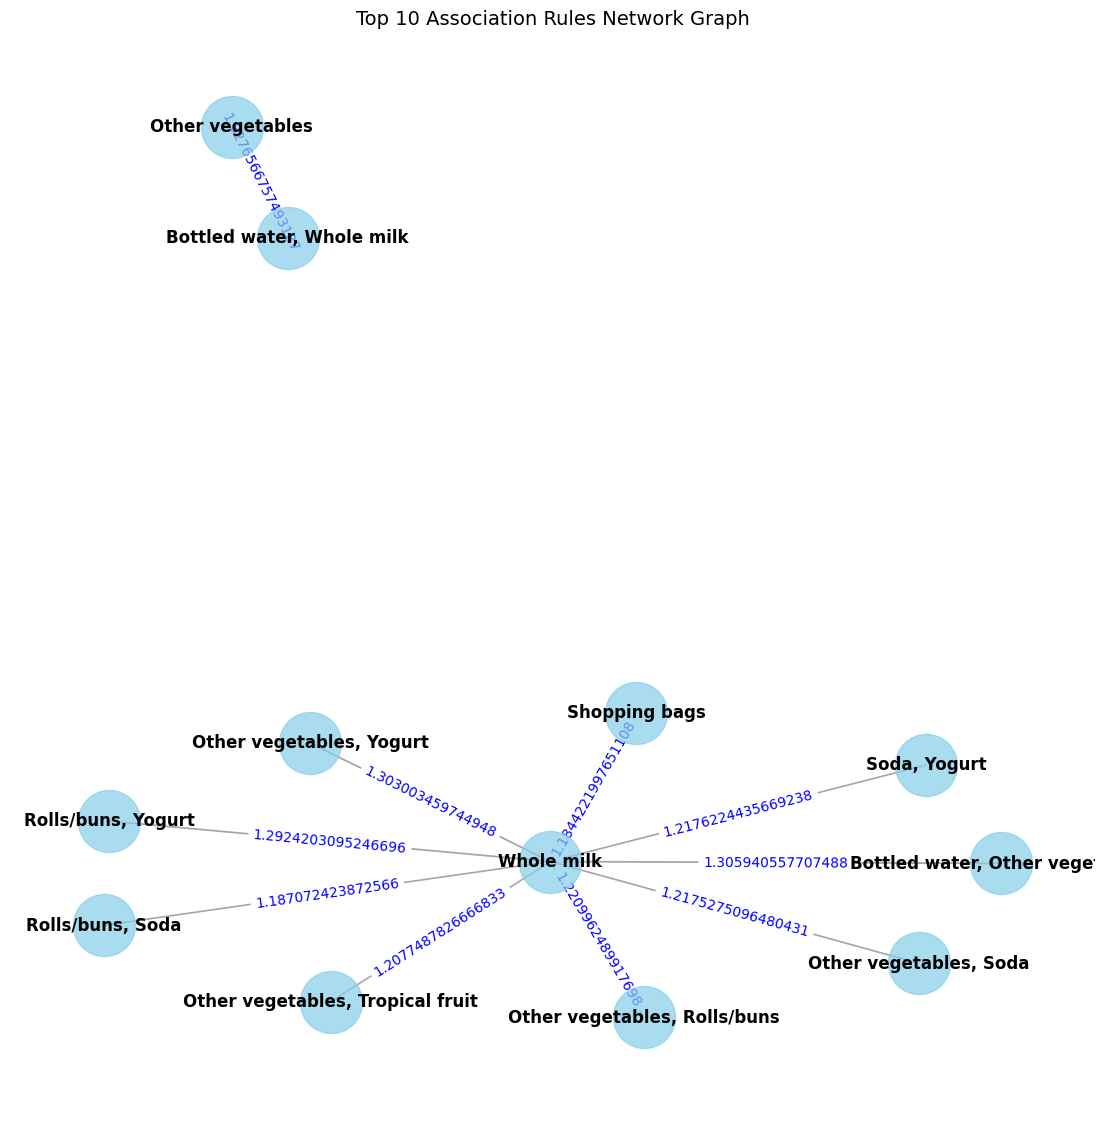

In [15]:
top_10_rules = results_df.nlargest(10, 'lift')  # Sort by 'lift' and take the top 10

G = nx.Graph()

# Convert frozensets to strings for better visualization
for index, row in top_10_rules.iterrows():
    antecedent = ', '.join(row['antecedents'])  # Convert frozenset to string
    consequent = ', '.join(row['consequents'])  # Convert frozenset to string
    lift = row['lift']
    
    G.add_edge(antecedent, consequent, weight=lift)

plt.figure(figsize=(14, 14))
pos = nx.spring_layout(G, k=0.5, iterations=50)

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=2000, node_color="skyblue", alpha=0.7)

# Draw edges with varying thickness based on lift
edge_widths = [G[u][v]['weight'] for u, v in G.edges()]
nx.draw_networkx_edges(G, pos, width=edge_widths, alpha=0.7, edge_color="gray")

# Draw labels
nx.draw_networkx_labels(G, pos, font_size=12, font_weight="bold", font_color="black")

# Draw edge labels with lift values
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10, font_color="blue")

plt.title('Top 10 Association Rules Network Graph', fontsize=14)
plt.axis('off')
plt.show()
